In [1]:
import cv2
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("dark")

DATA_ROOT = "../data"

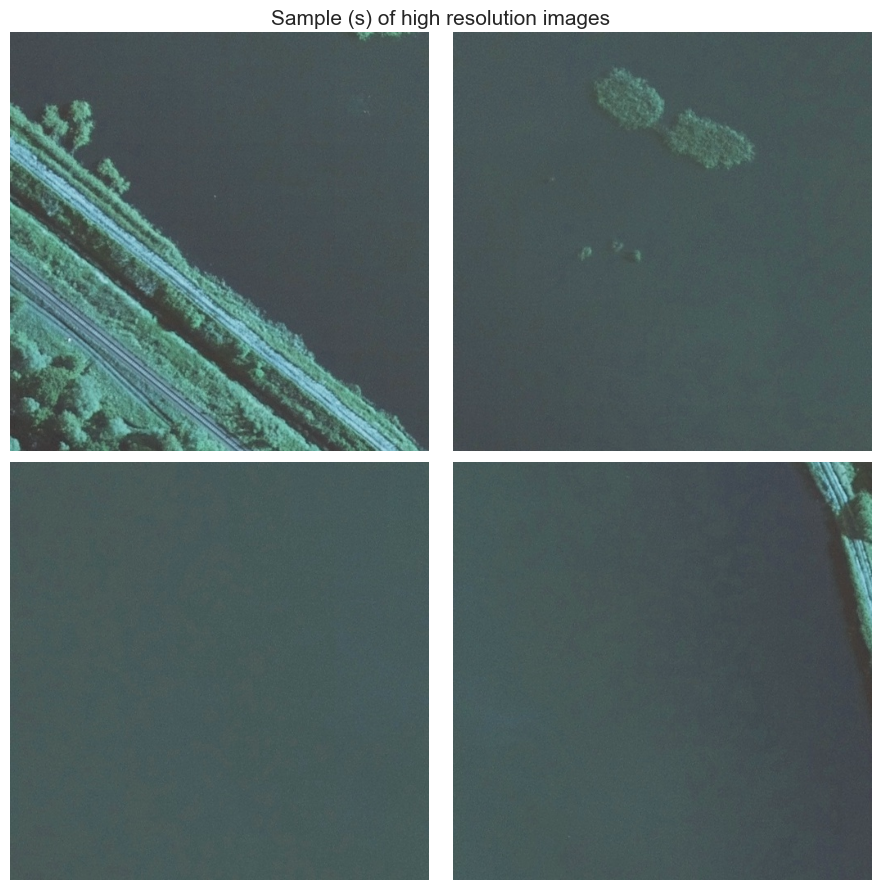

In [2]:
images_list = list(glob.glob(os.path.join(DATA_ROOT, "merge", "*.jpg")))
samples = [0,1,2,3]
fig, ax = plt.subplots(figsize = (9,9), nrows = 2, ncols =2)
for i, sample in enumerate(samples):
    r,c = divmod(i,2)
    ax[r,c].imshow(cv2.imread(images_list[sample])/255)
    ax[r,c].axis("off")
plt.suptitle("Sample (s) of high resolution images", fontsize = 15)
plt.tight_layout(pad=0.8)
plt.savefig("Samples.png")
plt.show()

[ 6 14 10  7  6 10 10  3]


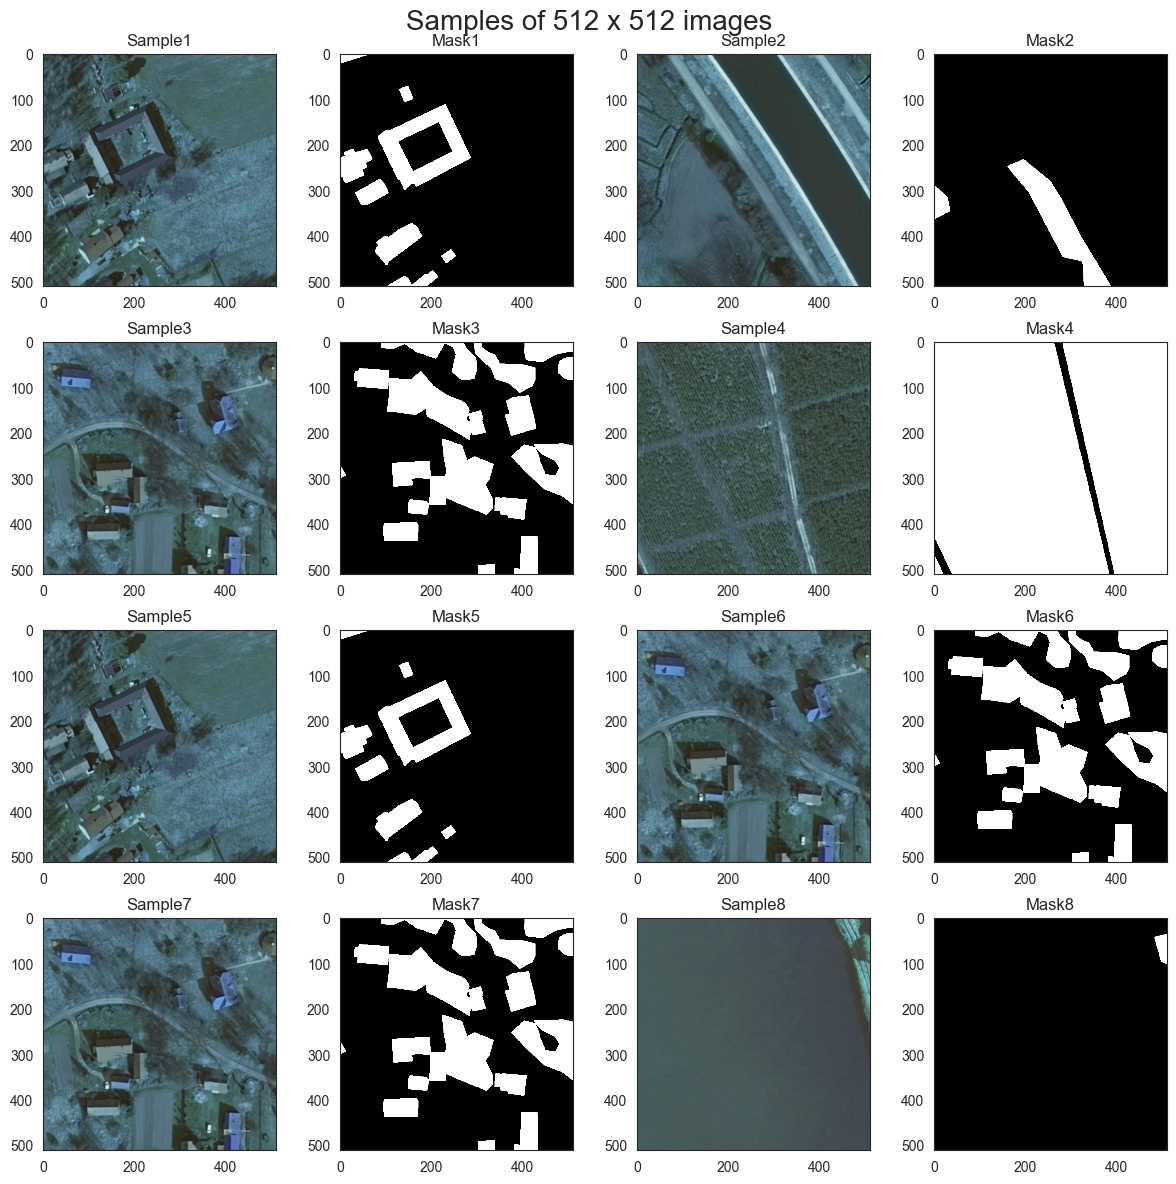

In [3]:
from utils import visualize_dataset
# TODO indicies festlegen indices = [0,1,17,20,29,5,6,7]
visualize_dataset(num_samples = 8, w = 12, h = 12, pad = 1.4,
                  save_title = "Visualize_dataset")

In [4]:
import torch
from torch.utils.data import DataLoader
from utils import SegmentationDataset

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"using " + device)

using cpu


** existing classes *

urban_land          0  ,255,255     1 
agriculture_land    255,255,0       6
rangeland           255,0  ,255     7
forest_land         0  ,255,0       2
water               0  ,0  ,255     3
barren_land         255,255,255     5
unknown             0  ,0  ,0       4

building (1), woodland (2), water(3), road(4)
->
building 1 -> 0,255,255 urban_land
woodland 2 -> 0,255,0   forest_land
water    3 -> 0,0,255   water
road     4 -> 0,0,0     unknown


In [5]:
train_set = SegmentationDataset(mode = "train")
train_dloader = DataLoader(train_set,batch_size = 8,num_workers =2)

class_dist = {"background":0, "building":0,
              "woodland":0, "water":0, "road":0}
label_mapping = {0: "background", 1: "building",
                 2: "woodland", 3: "water", 4: "road"}

for img,mask in train_dloader:
    for class_label in label_mapping.keys():
        class_dist[label_mapping[class_label]] += mask[mask == class_label].numpy().size

FileNotFoundError: [Errno 2] No such file or directory: '../input/landcoverai\\train.txt'